In [1]:
import freud
import gsd
import hoomd
import gsd.pygsd
import gsd.hoomd
import signac
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from collections import Counter
hoomd.context.initialize("")

HOOMD-blue 2.9.0 DOUBLE HPMC_MIXED TBB SSE SSE2 SSE3 
Compiled: 05/18/2020
Copyright (c) 2009-2019 The Regents of the University of Michigan.
-----
You are using HOOMD-blue. Please cite the following:
* J A Anderson, C D Lorenz, and A Travesset. "General purpose molecular dynamics
  simulations fully implemented on graphics processing units", Journal of
  Computational Physics 227 (2008) 5342--5359
* J Glaser, T D Nguyen, J A Anderson, P Lui, F Spiga, J A Millan, D C Morse, and
  S C Glotzer. "Strong scaling of general-purpose molecular dynamics simulations
  on GPUs", Computer Physics Communications 192 (2015) 97--107
-----
HOOMD-blue is running on the CPU


In [2]:
itic_path= "/home/erjank_project/itic-project/"
project = signac.get_project(itic_path)

In [6]:
state_dict={"size": "small", 
            "process": "quench",
            "kT_reduced":1.2, 
            "density":0.9}
job_list= project.find_jobs(state_dict)
#specify file type
for job in job_list:
    job_path= job.fn('trajectory.gsd')

In [7]:
def atom_type_pos(snap, atom_type):
    if not isinstance(atom_type, list):
        atom_type = [atom_type]
    positions = []
    for atom in atom_type:
        indices = np.where(snap.particles.typeid == snap.particles.types.index(atom))
        positions.append(snap.particles.position[indices])
    return np.concatenate(positions)

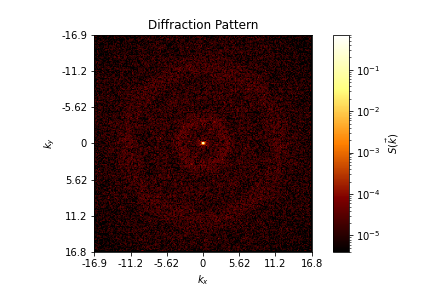

<Figure size 432x288 with 0 Axes>

In [8]:
f = gsd.pygsd.GSDFile(open(job_path, "rb"))
t = gsd.hoomd.HOOMDTrajectory(f)
last_frame = [-1]
frame = len(t)
snap = hoomd.data.gsd_snapshot(job_path, frame-1)
points = snap.particles.position
box = freud.Box.from_box(snap.box)
dp = freud.diffraction.DiffractionPattern(grid_size=1024,
                                  output_size=1024)
dp.compute((box, points), view_orientation=np.array([1,0,0,0]))